# Training a VAE on Bernoulli dataset


In [1]:
import dynalearn as dl
import matplotlib.pyplot as plt
import numpy as np
import torch

## Training paramters

In [2]:
n_input = 100
n_hidden = [64, 32]
n_embedding = 8
numsample=50000
keepprob=1.

## Generating the Bernoulli dataset

In [3]:
train_dataset = dl.Bernoulli_Dataset(dim=n_input, numsample=numsample,p=None)
val_dataset = dl.Bernoulli_Dataset(dim=n_input, numsample=1000,p=train_dataset.p)

## Defining the generative model (VAE)

In [5]:
optimizer = lambda p: torch.optim.Adam(p, lr=1e-3)
#optimizer = lambda p: torch.optim.SGD(p, lr=1e-3)
fcvae = dl.FC_VAE(n_input, n_hidden, n_embedding, keepprob, optimizer=optimizer, use_cuda=False)
fcvae.optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

## Training

In [6]:
fcvae.fit(train_dataset=train_dataset, val_dataset=val_dataset, epochs=100, batch_size=64)

Epoch 0 - Train loss: 49.7450 - Val loss: 49.6985 - Training time: 3.3373 - New best config.
Epoch 1 - Train loss: 49.4566 - Val loss: 49.4604 - Training time: 3.8842 - New best config.
Epoch 2 - Train loss: 49.3692 - Val loss: 49.3861 - Training time: 5.3124 - New best config.
Epoch 3 - Train loss: 49.2752 - Val loss: 49.3307 - Training time: 5.1361 - New best config.
Epoch 4 - Train loss: 49.0860 - Val loss: 49.1148 - Training time: 4.6185 - New best config.
Epoch 5 - Train loss: 48.8558 - Val loss: 48.9258 - Training time: 5.6499 - New best config.
Epoch 6 - Train loss: 48.6674 - Val loss: 48.6518 - Training time: 3.9439 - New best config.
Epoch 7 - Train loss: 48.5254 - Val loss: 48.5278 - Training time: 4.0104 - New best config.
Epoch 8 - Train loss: 48.4436 - Val loss: 48.4815 - Training time: 4.2611 - New best config.
Epoch 9 - Train loss: 48.4336 - Val loss: 48.4282 - Training time: 6.2969 - New best config.
Epoch 10 - Train loss: 48.3927 - Val loss: 48.4180 - Training time: 4.

## Testing and checking the results

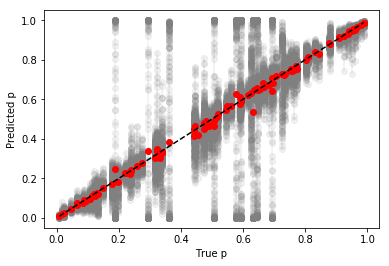

In [9]:
sample, z = fcvae.predict(256)
def display_result(p_pred, p_true):
    fig, ax = plt.subplots(1, 1)
    
    for i, p in enumerate(p_true):
        n, m = p_pred.shape
        ax.plot(np.ones(n) * p, p_pred[:, i], c='gray', marker='o', alpha=0.1)
        
    for i, p in enumerate(p_true):
        ax.plot(p, np.mean(p_pred[:, i]), 'ro', alpha=1)
    
    ax.plot([min(p_true), max(p_true)], [min(p_true), max(p_true)], 'k--')
    ax.set_xlabel('True p')
    ax.set_ylabel('Predicted p')
    fig.savefig('fig/png/bernoulli_parameters.png')
    fig.savefig('fig/pdf/bernoulli_parameters.pdf')
    plt.show()

display_result(sample, train_dataset.p)
